# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [ ]:
!pip install nba_api
from nba_api.stats.static import players
import pandas as pd
import time


     |████████████████████████████████| 125 kB 4.2 MB/s 
  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251504 sha256=2e46e3cd24e1b04a252e56259a17885ad64e0ec2bba46820a3c2892dcc59dc13
  Stored in directory: /root/.cache/pip/wheels/e3/f4/46/996128675381abc175e306642bae575d372dcf7efc4683e551
Successfully built nba-api


In [ ]:
from nba_api.stats.endpoints import commonallplayers

def get_and_save_players_list():
  players = commonallplayers.CommonAllPlayers(is_only_current_season =1).get_data_frames()[0]
  players = players[ (players["TEAM_NAME"]!="") 
  & (players["GAMES_PLAYED_FLAG"]!="N") 
  & (players["PERSON_ID"]!=1630597) ]
  players = players[["PERSON_ID","DISPLAY_FIRST_LAST","TEAM_NAME"]]
  players = players.rename(columns={"PERSON_ID": "PLAYER_ID", "DISPLAY_FIRST_LAST": "PLAYER_NAME"})
  players.to_csv("nba_current_players_list.csv")
  return players

data = get_and_save_players_list()
data

,PLAYER_ID,PLAYER_NAME,TEAM_NAME
0,1630173,Precious Achiuwa,Raptors
1,203500,Steven Adams,Grizzlies
2,1628389,Bam Adebayo,Heat
3,1630583,Santi Aldama,Grizzlies
4,200746,LaMarcus Aldridge,Nets
...,...,...,...
612,1628221,Gabe York,Pacers
613,201152,Thaddeus Young,Raptors
614,1629027,Trae Young,Hawks
615,1630209,Omer Yurtseven,Heat


In [ ]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [ ]:
from nba_api.stats.endpoints import commonplayerinfo

def get_players_personal_information(current_players_list):
  players_list = list(current_players_list["PLAYER_ID"])
  all_players = pd.DataFrame()
  n = 0
  print(n)
  for player in players_list:
      n+=1
      player_info = commonplayerinfo.CommonPlayerInfo(player_id=player).get_data_frames()
      player_info = player_info[0]
      all_players = pd.concat([all_players,player_info])
      time.sleep(0.5)

  all_players = all_players[["PERSON_ID","DISPLAY_FIRST_LAST", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]
  all_players.rename(
    columns = {"PERSON_ID":"PLAYER_ID", "DISPLAY_FIRST_LAST":"FULL_NAME"}, inplace = True)
  all_players.to_csv("nba_players_personal_info.csv")
  return all_players
  all_players

In [ ]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

0


3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [ ]:
from nba_api.stats.endpoints import playercareerstats
def get_players_career_stats(current_players_list):

  players_list = list(current_players_list["PLAYER_ID"])
  all_players = pd.DataFrame()
  n = 0
  print(n)
  for player in players_list:
      n+=1
      player_careers = playercareerstats.PlayerCareerStats(player_id=player,per_mode36= "PerGame" ).get_data_frames()
      player_careers = player_careers[1]
      all_players = pd.concat([all_players,player_careers])
      time.sleep(0.5)
  print(n)
  all_players = all_players[["PLAYER_ID","GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]]
  all_players.to_csv("nba_players_career_stats.csv")
  return all_players

In [ ]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

0
504


4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [ ]:
from nba_api.stats.endpoints import playerprofilev2
import time
def get_players_next_game(current_players_list):
  all_players_next = pd.DataFrame()
  players_list_id = []
  n = 0

  for playerid in (current_players_list["PLAYER_ID"]):

      players_list_id.append(playerid)
      player_v2 = playerprofilev2.PlayerProfileV2(player_id=playerid, per_mode36 = "PerGame") 


      next_games_p = player_v2.next_game.get_data_frame() 
      next_games_p = next_games_p["GAME_DATE"]

      if next_games_p.empty:
        empy_resp = pd.Series(["NaN"]) 
        all_players_next= pd.concat([all_players_next, empy_resp])
      
      else: 
        all_players_next = pd.concat([all_players_next, next_games_p])
      time.sleep(0.8)
      n+=1

  all_players_next.columns = ["GAME_TIME"]
  all_players_next["PLAYER_ID"] = players_list_id
  all_players_next.rename(
    columns = {"GAME_TIME":"GAME_DATE"}, inplace = True)

  return all_players_next[["PLAYER_ID", "GAME_DATE"]].reset_index(drop=True)


In [ ]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv")

5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [ ]:
!pip install Unidecode

     |████████████████████████████████| 235 kB 4.1 MB/s 


In [ ]:
from unidecode import unidecode

players_salaries = pd.read_csv("nba_players_salary.csv")
players_salaries = players_salaries[["Player", "2021-22"]]
players_salaries = players_salaries.rename(columns={"Player":"PLAYER_NAME", "2021-22":"SALARY"})


players_salaries.drop_duplicates(subset=["PLAYER_NAME"], inplace=True, keep="first")

players_salaries["PLAYER_NAME"] = players_salaries["PLAYER_NAME"].str.split("\\").str[0]
players_salaries["PLAYER_NAME"] = players_salaries["PLAYER_NAME"].apply(unidecode)

players_salaries.dropna(subset=["SALARY"], inplace=True)


In [ ]:
players_salaries.to_csv("nba_players_salary.csv")

6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [ ]:
def merge_dataframes():
    df_final = players_personal_info.merge(current_players_list,
                                           on ="PLAYER_ID").merge(players_career_stats,
                                           on="PLAYER_ID").merge(players_next_game,
                                           on="PLAYER_ID").merge(players_salaries, on="PLAYER_NAME")

    df_final.drop(["PLAYER_ID", "TEAM_NAME_y", "TEAM_NAME_y", "PLAYER_NAME"], axis=1, inplace=True)
    df_final.rename(
      columns = {"FULL_NAME":"PLAYER_NAME", "TEAM_NAME_x":"TEAM_NAME"}, inplace = True)

                                           
    return df_final    

In [ ]:
raw_players_dataset = merge_dataframes()
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [ ]:
def copy_and_delete_nan(raw_players_dataset):
    working_df = raw_players_dataset.copy()
    working_df["TEAM_NAME"].dropna(inplace=True)
    working_df["SALARY"].dropna(inplace=True)

    return working_df

In [ ]:
working_df = copy_and_delete_nan(raw_players_dataset)

2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [ ]:
def cast_columns(working_df):
    working_df["SALARY"] = working_df["SALARY"].str.replace('[\$\,]', '', regex=True).astype(int)
    working_df['BIRTHDATE'] = working_df['BIRTHDATE'].astype('datetime64')
    working_df['GAME_DATE'] = pd.to_datetime(working_df.GAME_DATE)

In [ ]:
cast_columns(working_df)

3- Create a function that converts the height column from height in feet and inches to centimeters

In [ ]:
import numpy as np
def convert_height_column(working_df):
  working_df["HEIGHT"] = working_df["HEIGHT"].apply(lambda x: int(round(int(x[:1])*30.48 + int(x[2:])*2.54,0)))
  return


In [ ]:
convert_height_column(working_df)

4- Create a function that converts the weight column from pounds to kilograms

In [ ]:
import numpy as np
def convert_weight_column():
  pound_value = 0.453592

  pounds = working_df.WEIGHT
  pounds = np.array(pounds.astype({"WEIGHT": int}))

  total_weight = list(pound_value*pounds)
  working_df["WEIGHT"] = [int(weight) for weight in total_weight]
  return working_df

In [ ]:
working_df = convert_weight_column()
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
0,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-28,2711280
1,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-26,17073171
2,Bam Adebayo,Heat,Center-Forward,206,115,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-26,28103550
3,Santi Aldama,Grizzlies,Forward-Center,211,97,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-26,1994520
4,LaMarcus Aldridge,Nets,Center-Forward,211,113,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-27,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Delon Wright,Hawks,Guard,196,83,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-26,8526316
442,Thaddeus Young,Raptors,Forward,203,106,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-28,14190000
443,Trae Young,Hawks,Guard,185,74,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-26,8326471
444,Omer Yurtseven,Heat,Center,211,124,Turkey,1998-06-19,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,2022-04-26,1489065


5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [ ]:
def add_age_column(working_df):
  def age(birthdate):
    today = date.today()
    years = str(today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day)))
    months = str(abs(today.month-birthdate.month))
    days = str(abs(today.day-birthdate.day))
    age = years + " years, " + months + " months, " + days + " days"
    return age
  ages = []
  for f in working_df.BIRTHDATE.index:
    ages.append(age(working_df.BIRTHDATE[f]))
  working_df["AGE"] = ages
  return


In [ ]:
add_age_column(working_df)

6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [ ]:
def update_position(working_df):
    split_aux = working_df['POSITION'].str.split('-', expand=True)
    split_aux = split_aux.iloc[:,0]
    working_df['POSITION'] = split_aux
    return working_df

In [ ]:
update_position(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
0,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-28,2711280,"22 years, 5 months, 7 days"
1,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-26,17073171,"28 years, 3 months, 6 days"
2,Bam Adebayo,Heat,Center,206,115,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-26,28103550,"24 years, 3 months, 8 days"
3,Santi Aldama,Grizzlies,Forward,211,97,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-26,1994520,"21 years, 3 months, 16 days"
4,LaMarcus Aldridge,Nets,Center,211,113,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-27,2641691,"36 years, 3 months, 7 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Delon Wright,Hawks,Guard,196,83,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-26,8526316,"30 years, 0 months, 0 days"
442,Thaddeus Young,Raptors,Forward,203,106,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-28,14190000,"33 years, 2 months, 5 days"
443,Trae Young,Hawks,Guard,185,74,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-26,8326471,"23 years, 5 months, 7 days"
444,Omer Yurtseven,Heat,Center,211,124,Turkey,1998-06-19,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,2022-04-26,1489065,"23 years, 2 months, 7 days"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [ ]:
working_df.replace({"Undrafted":np.nan}, inplace=True)
working_df['DRAFT_NUMBER'] = working_df['DRAFT_NUMBER'].str.extract('(\d+)', expand=False).astype('float').astype('Int64')

In [ ]:
working_df.to_csv("nba_players_processed_dataset.csv")


## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [ ]:
total_player = len(working_df)
print("Total number of players",total_player)

usa_player = len(working_df.loc[working_df.COUNTRY=="USA"])
print("Number of USA born players",usa_player)

foreign_pla = total_player - usa_player
print("Number of foreign players", foreign_pla)

rokies_player = len(working_df.loc[working_df.SEASON_EXP <=1])
print("Number of rookies (first year players)",rokies_player)

all_p_center = len(working_df.loc[working_df.POSITION == "Center"])
all_p_guard = len(working_df.loc[working_df.POSITION == "Guard"])
all_p_forwar = len(working_df.loc[working_df.POSITION == "Forward"])

print("Number of players per position for center", all_p_center)

print("Number of players per position for forwar", all_p_forwar)

print("Number of players per position for guard", all_p_guard)

for team in sorted(working_df.TEAM_NAME.unique()):
  num = len(working_df.loc[working_df.TEAM_NAME == team])
  print("Count", num, "in team", team)


Total number of players 446
Number of USA born players 338
Number of foreign players 108
Number of rookies (first year players) 117
Number of players per position for center 59
Number of players per position for forwar 175
Number of players per position for guard 212
Count 15 in team 76ers
Count 14 in team Bucks
Count 16 in team Bulls
Count 16 in team Cavaliers
Count 14 in team Celtics
Count 13 in team Clippers
Count 15 in team Grizzlies
Count 14 in team Hawks
Count 15 in team Heat
Count 15 in team Hornets
Count 15 in team Jazz
Count 15 in team Kings
Count 14 in team Knicks
Count 15 in team Lakers
Count 15 in team Magic
Count 15 in team Mavericks
Count 15 in team Nets
Count 14 in team Nuggets
Count 15 in team Pacers
Count 16 in team Pelicans
Count 14 in team Pistons
Count 15 in team Raptors
Count 15 in team Rockets
Count 16 in team Spurs
Count 15 in team Suns
Count 15 in team Thunder
Count 15 in team Timberwolves
Count 15 in team Trail Blazers
Count 15 in team Warriors
Count 15 in team

In [ ]:
avg = int(np.mean(working_df.AGE.str[:2].astype(int)))
print("Average player age (in years):", avg)

birthdate = working_df.loc[working_df.BIRTHDATE == min(working_df.BIRTHDATE)].AGE.values[0]
print("old player age",birthdate)

birthdate_max = working_df.loc[working_df.BIRTHDATE == max(working_df.BIRTHDATE)].AGE.values[0]
print("Youngest player age",birthdate_max)

min_hight = min(working_df["HEIGHT"])
print("Min players height",min_hight)

max_hight = max(working_df["HEIGHT"])
print("Max players height",max_hight)



avg_height = int(round(np.mean(working_df.loc[working_df.POSITION=="Center"].HEIGHT),0))
print("Average height of players per Center", avg_height)

avg_height = int(round(np.mean(working_df.loc[working_df.POSITION=="Forward"].HEIGHT),0))
print("Average height of players per Forward", avg_height)

avg_height = int(round(np.mean(working_df.loc[working_df.POSITION=="Guard"].HEIGHT),0))
print("Average height of players per Guard", avg_height)

Average player age (in years): 26
old player age 41 years, 2 months, 17 days
Youngest player age 19 years, 8 months, 2 days
Min players height 175
Max players height 221
Average height of players per Center 211
Average height of players per Forward 203
Average height of players per Guard 192


In [ ]:
max_salary = max(working_df["SALARY"])

min_salary = min(working_df["SALARY"])

mean = np.mean(working_df["SALARY"])

median = np.median(working_df["SALARY"])

print("The min salary of all players is:", min_salary)
print("The max salary of all players is:", max_salary)
print("The mean salary of all players is:", mean)
print("The median salary of all players is:", median)



The min salary of all players is: 5318
The max salary of all players is: 45780966
The mean salary of all players is: 8728325.706278026
The median salary of all players is: 4405080.0


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

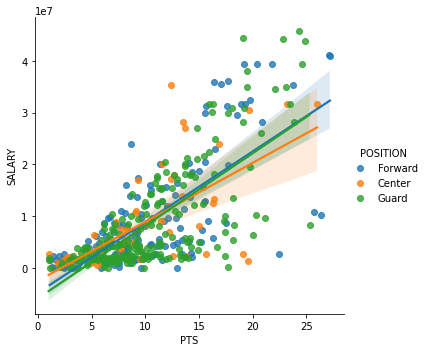

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt 


sns.lmplot(data=working_df, x="PTS", y="SALARY", hue ="POSITION")

3- Now plot assists-vs-salary and rebounding-vs-salary

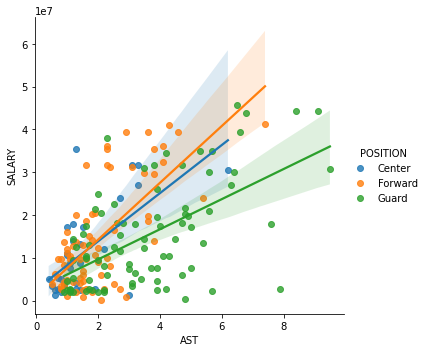

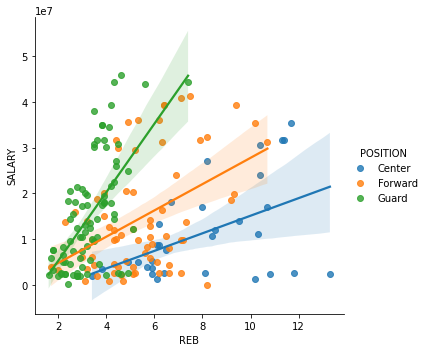

In [ ]:
sns.lmplot(x="AST", y="SALARY", hue="POSITION", data=data)
sns.lmplot(x="REB", y="SALARY", hue="POSITION", data=data)

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

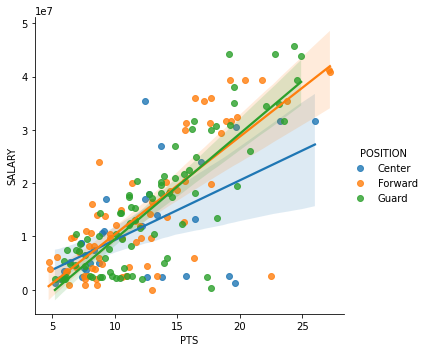

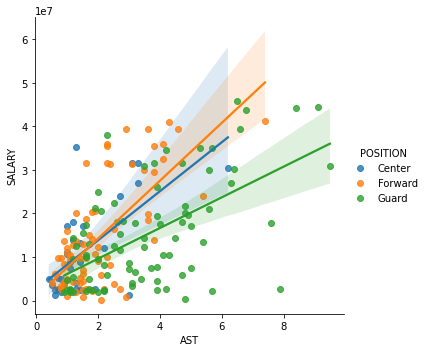

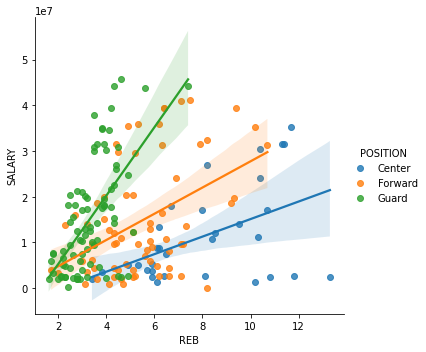

In [ ]:
filters = (working_df.SEASON_EXP >= 5)
data = working_df[filters]
a1 = sns.lmplot(x="PTS", y="SALARY", hue="POSITION", data=data)
a2 = sns.lmplot(x="AST", y="SALARY", hue="POSITION", data=data)
a3 = sns.lmplot(x="REB", y="SALARY", hue="POSITION", data=data)



5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


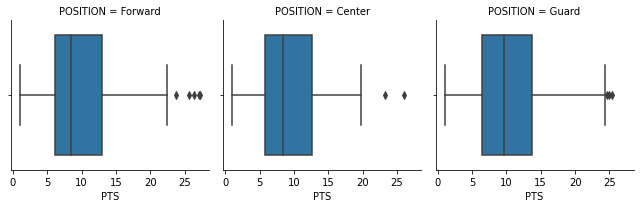

In [ ]:
a = sns.FacetGrid(data=working_df, col='POSITION')
a.map(sns.boxplot, 'PTS')
plt.show()


6- Plot the Height distribution of all players

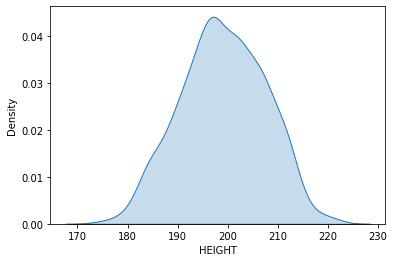

In [ ]:
sns.kdeplot(data=working_df["HEIGHT"], shade=True)
